# Neural Network Project
- Amirhossein Najafizadeh
- 9831065

## First step (Getting the dataset)
First we get our dataset from CIFAR-10.

In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 212MB/s]


Lets check for the CIFAR10 directory existence:

In [2]:
%ls -la

total 19320
drwxr-xr-x 1 root root     4096 Apr 23 11:27 ./
drwxr-xr-x 1 root root     4096 Apr 23 11:27 ../
drwxr-xr-x 4 root root     4096 Mar  7 17:47 CIFAR10/
-rw-r--r-- 1 root root 19760888 Apr 23 11:27 CIFAR10.tar.gz
drwxr-xr-x 4 root root     4096 Apr 19 14:22 .config/
drwxr-xr-x 1 root root     4096 Apr 19 14:23 sample_data/


### Imports
First we need to import tensorflow, keras, numpy and matplotlib.

In [51]:
# Tensorflow
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
# Numpy
import numpy as np
from numpy.lib.shape_base import vsplit
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# cv
import cv2
# time
import time

### Load dataset
On the next step, we load our dataset and open the first image of each class.

In [4]:
# class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

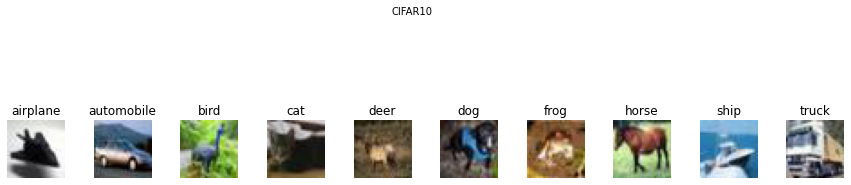

In [73]:
# displaying one image of each class
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.suptitle('CIFAR10', size=10)
plt.subplots_adjust(wspace=0.5)

for i in range(len(class_names)):
  class_name = class_names[i]
  img = mpimg.imread(f'./CIFAR10/train/{class_name}/0000.jpg')
  plt.subplot(10, 10, i+1)
  plt.title(class_name)
  plt.axis(False)
  plt.imshow(img)

### Create the main matrixes 
In this part we are going to create four matrixes. Test data and labases, train data and labels.

Lets being ...

In [6]:
# Selected types
categories = ['airplane', 'automobile', 'bird', 'cat']

In [7]:
train_images, test_images = [], []
train_labels, test_labels = np.array([0, 0, 0, 0]), np.array([0, 0, 0, 0])

In [8]:
# importing os, listdir to get all image files
from os import listdir
from os.path import join

In [9]:
# create matrixes
for category in categories:
  # pathes to our datasets
  train_path = f'./CIFAR10/train/{category}/'
  test_path = f'./CIFAR10/test/{category}/'

  tr_images = [f for f in listdir(train_path)]
  te_images = [f for f in listdir(test_path)]

  tr_images.sort()
  te_images.sort()
  
  # getting the train and test images
  for image in tr_images:
    img = cv2.imread(join(train_path, image))

    train_images.append(img)
    
    lb = np.zeros((1, 4))
    lb[0][categories.index(category )] = 1

    train_labels = np.vstack((train_labels, lb))
  for image in te_images:
    img = cv2.imread(join(test_path, image))

    test_images.append(img)

    lb = np.zeros((1, 4))
    lb[0][categories.index(category )] = 1

    test_labels = np.vstack((test_labels, lb))

# converting our normal lists to numpy array
train_images, test_images = np.array(train_images), np.array(test_images)
# removing the first train labels
train_labels, test_labels = np.delete(train_labels, 0, 0), np.delete(test_labels, 0, 0)

# check the results
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

Train images: (20000, 32, 32, 3)
Train labels: (20000, 4)
Test images: (4000, 32, 32, 3)
Test labels: (4000, 4)


### Convergin to gray scale
Now we convert our images to gray scale.

In [10]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [11]:
# now we convert
train_images, test_images = rgb2gray(train_images), rgb2gray(test_images)
# checking the results
print("Train images:", train_images.shape)
print("Test images:", test_images.shape)

Train images: (20000, 32, 32)
Test images: (4000, 32, 32)


### Normalising the images
Now we are going to normalise our images by dividing them in to 255,
after that our images will be a number between 0 and 255, hense the calculations will be less complex.

In [12]:
# normalisation
train_images, test_images = train_images / 255, test_images / 255

### Flating our data
In this part we are going to make our data flat by reshaping its vectors.

In [13]:
# making our data flat
train_images, test_images = train_images.reshape(-1, 1024), test_images.reshape(-1, 1024)
# checking the results
print("Train images:", train_images.shape)
print("Test images:", test_images.shape)

Train images: (20000, 1024)
Test images: (4000, 1024)


### Shuffling our dataset
In this part we are going to shuffle our dataset in a random way.

In [14]:
# our shuffle function
def shuffle(images, lable):
  # first we accumulate two arrays in to tuples
  temp = np.hstack((images, lable))
  # then we shuffle the tuples
  np.random.shuffle(temp)
  # now we split the arrays that we accumulate at the beginning 
  return (np.hsplit(temp, np.array([1024, ])))[0], (np.hsplit(temp, np.array([1024, ])))[1]

In [15]:
train_images, train_labels = shuffle(train_images, train_labels)
test_images, test_labels = shuffle(test_images, test_labels)

### First Part Conclusion 
In this part, we loaded our dataset. After that we created our main matrixes
from the first four categories of the first dataset images.

After that we implemented some methods to reduce the complexity of calculations in the next steps. These methods were, converting our images to gray scale, normalising our dataset, and finaly flating our data.

And for the final step, we shuffle our dataset to begin the next part.

## Second step (Feed forward)
In this step, we are going to implement the feed forwarding algorithm, so we can create our neural network.

### Methods
In this part we are going to create the methods, that are going to be used in this part.

#### Sigmoid
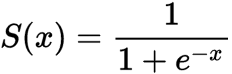

In [16]:
# sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#### Sigmoid prime

In [17]:
# sigmoid prime function
def sigmoid_prime(z):
  return sigmoid(z) * (1 - sigmoid(z))

### Feed forwarding
Now we are going to implement the feed forwarding by the methods we have.

In [18]:
# get the first 200 of our train images
X = (np.vsplit(train_images, np.array([200, ])))[0]
Y = (np.vsplit(train_labels, np.array([200, ])))[0]

In [19]:
# creating our levels nodes numbers
L1, L2, L3, L4 = 1024, 16, 16, 4

In [20]:
# creating the weight matrixes 
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))

In [21]:
# creating the bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [22]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

### Find the answer
Now that we implement our feed forwarding algorithm, its time to find the results.

In [23]:
# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1

### Calculating the accuracy 
Now we are going to calculate the accuracy, which we predict to be around 25.

In [24]:
# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 200) * 100
print("Accuracy:", ac)

Accuracy: 21.5


### Second part conclusion 
In this part we implemented the feed forwarding algorithm on the first 
200 samples of our dataset.

Then we found the maximum of the last layer and we calculate the accuracy which was 22.5 percent.

In the next part, we are going to work on Backpropogation.

## Third part (Backpropogation)
In this part we are going to reduce the cost function output to its minimum value.

First we need to define our cost function:

In [25]:
# our cost function
def comput_cost(Y, A3):
  return np.sum(np.power(Y - A3, 2))

After that we are going to redo the second step and trying to find the minimum value of our cost function.

In [26]:
# weighted matrixes between layers
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))

In [27]:
# bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [28]:
# parameters
BATCH = 16
EPOCHS = 10
LR = 0.3

In [29]:
# finding the batch numbers
rows = X.shape[0]
BATCH_NUMBER = int(rows / BATCH)

In [30]:
# epochs minimum
EPOCHS_COSTS = []

After we created our parameters, now we are going to implement the algorithm to find the cost of each epoch:

In [56]:
begin = time.time()
# a loop on epochs
for i in range(EPOCHS):
  print(f'EPOCH [{i+1}/{EPOCHS}] START')

  # shuffeling our dataset
  X, Y_star = shuffle(X, Y)
  # a loop on batch numbers
  for j in range(BATCH_NUMBER):
    # x and y of our batch
    BX = np.vsplit(X, np.array([16*j, 16*(j+1)]))[1]
    BY = np.vsplit(Y_star, np.array([16*j, 16*(j+1)]))[1]

    # gradiant of layer 3
    GW3 = np.zeros_like(W3)
    GB3 = np.zeros_like(B3)
    # gradiant of layer 2
    GW2 = np.zeros_like(W2)
    GB2 = np.zeros_like(B2)
    # gradiant of layer 1
    GW1 = np.zeros_like(W1)
    GB1 = np.zeros_like(B1)
    
    # a loop on each x of our batch
    for k in range(np.shape(BX)[0]):
      # reshaping the data
      IX = BX[k].reshape(1, 1024)
      IY = BY[k].reshape(4, 1)
      # calculate sigmoid
      A1 = sigmoid((np.dot(W1, IX.T) + B1))
      A2 = sigmoid((np.dot(W2, A1) + B2))
      A3 = sigmoid((np.dot(W3, A2) + B3))
      # calculating the gradiants of the layer 3
      TG3 = (2 * (A3 - IY) * (A3 * (1 - A3)))
      temp3 = np.zeros_like(GW3)
      for i1 in range(len(TG3)):
        for i2 in range(len(A2.T[0])):
          for i3 in range(len(A2.T)):
            temp3[i1][i2] += TG3[i1][i3] * A2.T[i3][i2]
      GW3 += temp3
      GB3 += (2 * (A3 - IY) * (A3 * (1 - A3)))   
      # calculating the gradiants of the layer 2
      GP2 = (2 * (A3 - IY) * (A3 * (1 - A3)))
      GA2 = np.dot((W3.T), GP2)
      TG2 = (GA2 * (A2 * (1 - A2)))
      temp2 = np.zeros_like(GW2)
      for i1 in range(len(TG2)):
        for i2 in range(len(A1.T[0])):
          for i3 in range(len(A1.T)):
            temp2[i1][i2] += TG2[i1][i3] * A1.T[i3][i2]
      GW2 += temp2  
      GB2 += (GA2 * (A2 * (1 - A2)))    
      # calculating the gradiants of the layer 1
      GP1 = (GA2 * (A2 * (1 - A2)))
      GA1 = np.dot((W2.T), GP1)
      TG1 = (GA1 * (A1 * (1 - A1)))
      temp1 = np.zeros_like(GW1)
      for i1 in range(len(TG1)):
        for i2 in range(len(IX[0])):
          for i3 in range(len(IX)):
            temp1[i1][i2] += TG1[i1][i3] * IX[i3][i2]
      GW1 += temp1
      GB1 += (GA1 * (A1 * (1 - A1)))

    # now we change the weighted matrixes
    W3 -= (LR * (GW3/BATCH))
    W2 -= (LR * (GW2/BATCH))
    W1 -= (LR * (GW1/BATCH))
    # changing the bayous vectors
    B3 -= (LR * (GB3/BATCH))
    B2 -= (LR * (GB2/BATCH))
    B1 -= (LR * (GB1/BATCH))

    print(f'BATCH [{j+1}] DONE')
  
  # final output calculate
  A1 = sigmoid((np.dot(W1, X.T) + B1))
  A2 = sigmoid((np.dot(W2, A1) + B2))
  A3 = sigmoid((np.dot(W3, A2) + B3))
  A3 = A3.T
  # calculating the cost
  c = comput_cost(Y_star, A3)
  EPOCHS_COSTS.append(c)

  print(f'EPOCH [{i+1}/{EPOCHS}] DONE: COST={c} IMAGES={np.shape(BX)[0]}')
print(f'Total Time : {time.time() - begin} seconds')

EPOCH [1/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [1/20] DONE: COST=149.87556916652267 IMAGES=16
EPOCH [2/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [2/20] DONE: COST=149.25614178797758 IMAGES=16
EPOCH [3/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [3/20] DONE: COST=149.49506440273404 IMAGES=16
EPOCH [4/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [4/20] DONE: COST=149.74765

And now we are going to show the model loss diagram:

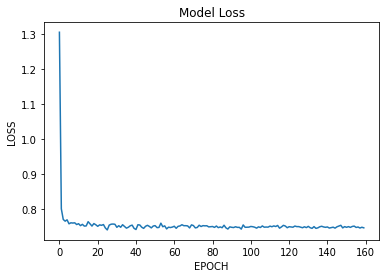

In [61]:
plt.plot(np.array(EPOCHS_COSTS)/rows)
plt.title("Model Loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

As you see, we have a decreasing rate for our model loss, so we are good to go to the next step, which is calculating the accuracy.

Just like second part:

In [58]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

In [59]:
# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1

In [60]:
# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 200) * 100
print("Accuracy:", ac)

Accuracy: 27.500000000000004


Our accuracy for the first 200 pictures is around 30 percents, so we are good.

### Third part conclusion 
In this part we implemented the Backpropagition algorithm.

After that we execute our algorithm on the first 200 images of our dataset and
then we calculate each epoch cost.

After that we showed the model loss diagram, and the accuracy.

## Forth part (Vectorization)
In this part we are going to vectorize the calculations so the total time of calculations will be reduced.

Firts we are going to create our parameters, then we are going to change our Backpropagation algorithm into vectorize.

In [36]:
# weighted matrixes between layers
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))

In [37]:
# bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [39]:
# parameters
BATCH = 16
EPOCHS = 20
LR = 0.3

In [40]:
# finding the batch numbers
rows = X.shape[0]
BATCH_NUMBER = int(rows / BATCH)

In [41]:
# epochs minimum
EPOCHS_COSTS = []

Now we are going to vectorize our code:

In [62]:
# repeating our main code 10 times
total_time = 0
for index in range(10):
  print(f'Test [{index+1}/{10}]:')

  begin = time.time()
  # a loop on epochs
  for i in range(EPOCHS):
    print(f'EPOCH [{i+1}/{EPOCHS}] START')

    # shuffeling our dataset
    X, Y_star = shuffle(X, Y)
    # a loop on batch numbers
    for j in range(BATCH_NUMBER):
      # x and y of our batch
      BX = np.vsplit(X, np.array([16*j, 16*(j+1)]))[1]
      BY = np.vsplit(Y_star, np.array([16*j, 16*(j+1)]))[1]

      # gradiant of layer 3
      GW3 = np.zeros_like(W3)
      GB3 = np.zeros_like(B3)
      # gradiant of layer 2
      GW2 = np.zeros_like(W2)
      GB2 = np.zeros_like(B2)
      # gradiant of layer 1
      GW1 = np.zeros_like(W1)
      GB1 = np.zeros_like(B1)
      
      # a loop on each x of our batch
      for k in range(np.shape(BX)[0]):
        # reshaping the data
        IX = BX[k].reshape(1, 1024)
        IY = BY[k].reshape(4, 1)
        # calculate sigmoid
        A1 = sigmoid((np.dot(W1, IX.T) + B1))
        A2 = sigmoid((np.dot(W2, A1) + B2))
        A3 = sigmoid((np.dot(W3, A2) + B3))
        # calculating the gradiants of the layer 3
        GW3 += (2 * (A3 - IY) * (A3 * (1 - A3))) @ (A2.T)    
        GB3 += (2 * (A3 - IY) * (A3 * (1 - A3)))   
        # calculating the gradiants of the layer 2
        GA2 = (W3.T) @ (2 * (A3 - IY) * (A3 * (1 - A3)))  
        GW2 += (GA2 * (A2 * (1 - A2))) @ (A1.T)    
        GB2 += (GA2 * (A2 * (1 - A2)))    
        # calculating the gradiants of the layer 1
        GA1 = (W2.T) @ (GA2 * (A2 * (1 - A2)))    
        GW1 += (GA1 * (A1 * (1 - A1))) @ (IX)
        GB1 += (GA1 * (A1 * (1 - A1)))

      # now we change the weighted matrixes
      W3 -= (LR * (GW3/BATCH))
      W2 -= (LR * (GW2/BATCH))
      W1 -= (LR * (GW1/BATCH))
      # changing the bayous vectors
      B3 -= (LR * (GB3/BATCH))
      B2 -= (LR * (GB2/BATCH))
      B1 -= (LR * (GB1/BATCH))

      print(f'BATCH [{j+1}] DONE')
    
    # final output calculate
    A1 = sigmoid((np.dot(W1, X.T) + B1))
    A2 = sigmoid((np.dot(W2, A1) + B2))
    A3 = sigmoid((np.dot(W3, A2) + B3))
    A3 = A3.T
    # calculating the cost
    c = comput_cost(Y_star, A3)
    EPOCHS_COSTS.append(c)

    print(f'EPOCH [{i+1}/{EPOCHS}] Done: COST={c} IMAGES={np.shape(BX)[0]}')

  finish = time.time() - begin
  total_time += finish

  print(f'Total Time : {finish} seconds')
print(f'Average time: {total_time / 10} seconds')

EPOCH [1/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [1/20] Done: COST=150.0662707437213 IMAGES=16
EPOCH [2/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [2/20] Done: COST=149.23537978740046 IMAGES=16
EPOCH [3/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [3/20] Done: COST=149.75542883983843 IMAGES=16
EPOCH [4/20] START
BATCH [1] DONE
BATCH [2] DONE
BATCH [3] DONE
BATCH [4] DONE
BATCH [5] DONE
BATCH [6] DONE
BATCH [7] DONE
BATCH [8] DONE
BATCH [9] DONE
BATCH [10] DONE
BATCH [11] DONE
BATCH [12] DONE
EPOCH [4/20] Done: COST=149.617532

Next, we are going to show the model loss diagram, and accuracy:

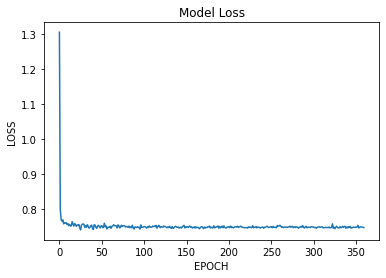

In [63]:
plt.plot(np.array(EPOCHS_COSTS)/rows)
plt.title("Model Loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [64]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

In [65]:
# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1

In [66]:
# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 200) * 100
print("Accuracy:", ac)

Accuracy: 28.000000000000004


### Forth part conclusion 
In this part, we vectorized our calculations to decrease the training time.

And now we get the to the final step of our project.

## Fifths part (Model Testing)
In our final step, we are going to test our model with the images in our dataset.

First we collect 8000 picture from our dataset.

In [74]:
# train images
X_train = (np.vsplit(train_images, np.array([8000, ])))[0]
Y_train = (np.vsplit(train_labels, np.array([8000, ])))[0]
# test images
X_test = (np.vsplit(test_images, np.array([8000, ])))[0]
Y_test = (np.vsplit(test_labels, np.array([8000, ])))[0]

Now we set hyperparameters:

In [75]:
# parameters
BATCH = 16
EPOCHS = 40
LR = 0.3

### Train

In [84]:
# weighted matrixes between layers
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))
# bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [85]:
# finding the batch numbers
rows = X_train.shape[0]
BATCH_NUMBER = int(rows / BATCH)

In [86]:
# epochs minimum
EPOCHS_COSTS = []

In [87]:
# repeating our main code 10 times
total_time = 0
for index in range(10):
  print(f'Test [{index+1}/{10}]:')

  begin = time.time()
  # a loop on epochs
  for i in range(EPOCHS):
    print(f'EPOCH [{i+1}/{EPOCHS}] START')

    # shuffeling our dataset
    X, Y_star = shuffle(X_train, Y_train)
    # a loop on batch numbers
    for j in range(BATCH_NUMBER):
      # x and y of our batch
      BX = np.vsplit(X, np.array([16*j, 16*(j+1)]))[1]
      BY = np.vsplit(Y_star, np.array([16*j, 16*(j+1)]))[1]

      # gradiant of layer 3
      GW3 = np.zeros_like(W3)
      GB3 = np.zeros_like(B3)
      # gradiant of layer 2
      GW2 = np.zeros_like(W2)
      GB2 = np.zeros_like(B2)
      # gradiant of layer 1
      GW1 = np.zeros_like(W1)
      GB1 = np.zeros_like(B1)
      
      # a loop on each x of our batch
      for k in range(np.shape(BX)[0]):
        # reshaping the data
        IX = BX[k].reshape(1, 1024)
        IY = BY[k].reshape(4, 1)
        # calculate sigmoid
        A1 = sigmoid((np.dot(W1, IX.T) + B1))
        A2 = sigmoid((np.dot(W2, A1) + B2))
        A3 = sigmoid((np.dot(W3, A2) + B3))
        # calculating the gradiants of the layer 3
        GW3 += (2 * (A3 - IY) * (A3 * (1 - A3))) @ (A2.T)    
        GB3 += (2 * (A3 - IY) * (A3 * (1 - A3)))   
        # calculating the gradiants of the layer 2
        GA2 = (W3.T) @ (2 * (A3 - IY) * (A3 * (1 - A3)))  
        GW2 += (GA2 * (A2 * (1 - A2))) @ (A1.T)    
        GB2 += (GA2 * (A2 * (1 - A2)))    
        # calculating the gradiants of the layer 1
        GA1 = (W2.T) @ (GA2 * (A2 * (1 - A2)))    
        GW1 += (GA1 * (A1 * (1 - A1))) @ (IX)
        GB1 += (GA1 * (A1 * (1 - A1)))

      # now we change the weighted matrixes
      W3 -= (LR * (GW3/BATCH))
      W2 -= (LR * (GW2/BATCH))
      W1 -= (LR * (GW1/BATCH))
      # changing the bayous vectors
      B3 -= (LR * (GB3/BATCH))
      B2 -= (LR * (GB2/BATCH))
      B1 -= (LR * (GB1/BATCH))

      print(f'BATCH [{j+1}] DONE')
    
    # final output calculate
    A1 = sigmoid((np.dot(W1, X.T) + B1))
    A2 = sigmoid((np.dot(W2, A1) + B2))
    A3 = sigmoid((np.dot(W3, A2) + B3))
    A3 = A3.T
    # calculating the cost
    c = comput_cost(Y_star, A3)
    EPOCHS_COSTS.append(c)

    print(f'EPOCH [{i+1}/{EPOCHS}] Done: COST={c} IMAGES={np.shape(BX)[0]}')

  finish = time.time() - begin
  total_time += finish

  print(f'Total Time : {finish} seconds')
print(f'Average time: {total_time / 10} seconds')

Streaming output truncated to the last 5000 lines.
BATCH [22] DONE
BATCH [23] DONE
BATCH [24] DONE
BATCH [25] DONE
BATCH [26] DONE
BATCH [27] DONE
BATCH [28] DONE
BATCH [29] DONE
BATCH [30] DONE
BATCH [31] DONE
BATCH [32] DONE
BATCH [33] DONE
BATCH [34] DONE
BATCH [35] DONE
BATCH [36] DONE
BATCH [37] DONE
BATCH [38] DONE
BATCH [39] DONE
BATCH [40] DONE
BATCH [41] DONE
BATCH [42] DONE
BATCH [43] DONE
BATCH [44] DONE
BATCH [45] DONE
BATCH [46] DONE
BATCH [47] DONE
BATCH [48] DONE
BATCH [49] DONE
BATCH [50] DONE
BATCH [51] DONE
BATCH [52] DONE
BATCH [53] DONE
BATCH [54] DONE
BATCH [55] DONE
BATCH [56] DONE
BATCH [57] DONE
BATCH [58] DONE
BATCH [59] DONE
BATCH [60] DONE
BATCH [61] DONE
BATCH [62] DONE
BATCH [63] DONE
BATCH [64] DONE
BATCH [65] DONE
BATCH [66] DONE
BATCH [67] DONE
BATCH [68] DONE
BATCH [69] DONE
BATCH [70] DONE
BATCH [71] DONE
BATCH [72] DONE
BATCH [73] DONE
BATCH [74] DONE
BATCH [75] DONE
BATCH [76] DONE
BATCH [77] DONE
BATCH [78] DONE
BATCH [79] DONE
BATCH [80] DONE
BATCH

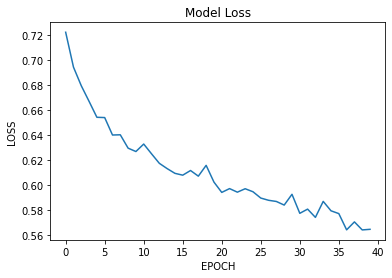

In [88]:
plt.plot(np.array(EPOCHS_COSTS)/rows)
plt.title("Model Loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [90]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y_train - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1

# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 4000) * 100
print("Accuracy:", ac)

Accuracy: 50.525


### Test


In [ ]:
# weighted matrixes between layers
W1 = np.random.normal(size=(L2, L1))
W2 = np.random.normal(size=(L3, L2))
W3 = np.random.normal(size=(L4, L3))
# bayous vectors
B1 = np.zeros((L2, 1))
B2 = np.zeros((L3, 1))
B3 = np.zeros((L4, 1))

In [ ]:
# finding the batch numbers
rows = X_test.shape[0]
BATCH_NUMBER = int(rows / BATCH)

In [ ]:
# epochs minimum
EPOCHS_COSTS = []

In [ ]:
# repeating our main code 10 times
total_time = 0
for index in range(10):
  print(f'Test [{index+1}/{10}]:')

  begin = time.time()
  # a loop on epochs
  for i in range(EPOCHS):
    print(f'EPOCH [{i+1}/{EPOCHS}] START')

    # shuffeling our dataset
    X, Y_star = shuffle(X_test, Y_test)
    # a loop on batch numbers
    for j in range(BATCH_NUMBER):
      # x and y of our batch
      BX = np.vsplit(X, np.array([16*j, 16*(j+1)]))[1]
      BY = np.vsplit(Y_star, np.array([16*j, 16*(j+1)]))[1]

      # gradiant of layer 3
      GW3 = np.zeros_like(W3)
      GB3 = np.zeros_like(B3)
      # gradiant of layer 2
      GW2 = np.zeros_like(W2)
      GB2 = np.zeros_like(B2)
      # gradiant of layer 1
      GW1 = np.zeros_like(W1)
      GB1 = np.zeros_like(B1)
      
      # a loop on each x of our batch
      for k in range(np.shape(BX)[0]):
        # reshaping the data
        IX = BX[k].reshape(1, 1024)
        IY = BY[k].reshape(4, 1)
        # calculate sigmoid
        A1 = sigmoid((np.dot(W1, IX.T) + B1))
        A2 = sigmoid((np.dot(W2, A1) + B2))
        A3 = sigmoid((np.dot(W3, A2) + B3))
        # calculating the gradiants of the layer 3
        GW3 += (2 * (A3 - IY) * (A3 * (1 - A3))) @ (A2.T)    
        GB3 += (2 * (A3 - IY) * (A3 * (1 - A3)))   
        # calculating the gradiants of the layer 2
        GA2 = (W3.T) @ (2 * (A3 - IY) * (A3 * (1 - A3)))  
        GW2 += (GA2 * (A2 * (1 - A2))) @ (A1.T)    
        GB2 += (GA2 * (A2 * (1 - A2)))    
        # calculating the gradiants of the layer 1
        GA1 = (W2.T) @ (GA2 * (A2 * (1 - A2)))    
        GW1 += (GA1 * (A1 * (1 - A1))) @ (IX)
        GB1 += (GA1 * (A1 * (1 - A1)))

      # now we change the weighted matrixes
      W3 -= (LR * (GW3/BATCH))
      W2 -= (LR * (GW2/BATCH))
      W1 -= (LR * (GW1/BATCH))
      # changing the bayous vectors
      B3 -= (LR * (GB3/BATCH))
      B2 -= (LR * (GB2/BATCH))
      B1 -= (LR * (GB1/BATCH))

      print(f'BATCH [{j+1}] DONE')
    
    # final output calculate
    A1 = sigmoid((np.dot(W1, X.T) + B1))
    A2 = sigmoid((np.dot(W2, A1) + B2))
    A3 = sigmoid((np.dot(W3, A2) + B3))
    A3 = A3.T
    # calculating the cost
    c = comput_cost(Y_star, A3)
    EPOCHS_COSTS.append(c)

    print(f'EPOCH [{i+1}/{EPOCHS}] Done: COST={c} IMAGES={np.shape(BX)[0]}')

  finish = time.time() - begin
  total_time += finish

  print(f'Total Time : {finish} seconds')
print(f'Average time: {total_time / 10} seconds')

In [ ]:
plt.plot(np.array(EPOCHS_COSTS)/rows)
plt.title("Model Loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [ ]:
# calculating the output of our 200 images
A1 = sigmoid((np.dot(W1, X.T) + B1))
A2 = sigmoid((np.dot(W2, A1) + B2))
A3 = sigmoid((np.dot(W3, A2) + B3))
A3 = A3.T

# creating an matrix as A3 matrix
Y2 = np.empty_like(A3)
# finding the maximum element
mx = 0
for i in np.argmax(A3, axis=1):
  temp = np.zeros((1, 4))
  temp[0, i] = 1
  Y2[mx] = temp

  mx += 1
# getting the intersections  
mx = 0
for i in (Y_test - Y2):
  if (i == np.array([0, 0, 0, 0])).all():
    mx += 1
    
# calculating the accuracy by dividing the maximum to all of our images
ac = (mx / 4000) * 100
print("Accuracy:", ac)